<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day48.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward Propagation and activation functions

**Understanding Forward Propagation**

- What is Forward Propagation?

  - Process by whcih input data flows through the layers of a Neural Network to produce an output

- Input Layer

  - Accepts input features and passes them to next layer

- Hidden Layers

  - Compute weighted sums of inputs, apply biases, and pass the result through activation functions

- Output Layer

  - Produces predictions, typically using an activation function suitable for the task



   


**Understanding Forward Propagation**

- Steps in Forward Propagation

    - Compute Weighted Sum

      - z = W . X + b
         
          - W: Weights | X: Inputs | b: Bias

- Apply Activation Function
   
   -  a = sigma(z)
      
      - σ: Activation function

- Repeat for Each Layer
   
   - Outputs of one layer become inputs to the next







### **Common Activation Functions**

* **Sigmoid**

  * **Use Case:** Binary classification in the output layer
  * **Limitation:** Can suffer from vanishing gradients for large positive/negative ( z )

* **Tanh (Hyperbolic Tangent)**

  * **Use Case:** Hidden layers where zero-centered outputs are preferred
  * **Limitation:** Also prone to vanishing gradients

* **ReLU (Rectified Linear Unit)**

  * **Use Case:** Most commonly used in hidden layers due to simplicity and efficiency
  * **Limitation:** Can suffer from the “dying ReLU” problem (neurons stuck at zero)

* **Softmax**

  * **Use Case:** Multi-class classification in the output layer



### Choosing Activation Functions

| Layer Type            | Recommended Activation Function |
|-----------------------|--------------------------------|
| Hidden Layers         | ReLU or Tanh                    |
| Output (Binary)       | Sigmoid                         |
| Output (Multi-Class)  | Softmax                         |
| Output (Regression)   | None or Linear                  |


**Objective**

- Implement forward Propagation for a simple Neural Network in Python and experiment with different activation functions

Sigmoid Activation Output: [[0.62714777]
 [0.64106741]]
Tanh Activation Output: [[0.47770001]
 [0.52266543]]
ReLU Activation Output: [[0.52]
 [0.58]]
Softmax Activation Output: [[0.4850045]
 [0.5149955]]


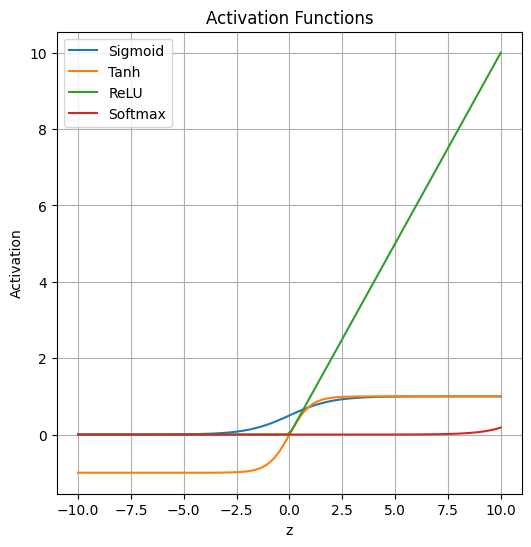

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define Activation Functions
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def tanh(z):
  return np.tanh(z)

def relu(z):
  return np.maximum(0, z)

def softmax(z):
  exp_z = np.exp(z - np.max(z))
  return exp_z / exp_z.sum(axis = 0, keepdims = True)

# Forward pass function
def forward_pass(X, weights, biases, activation_functions):
  z = np.dot(weights, X) + biases
  a = activation_functions(z)
  return a

# Example inputs
X = np.array([[0.5], [0.8]])
weights = np.array([[0.2, 0.4], [0.6, 0.1]])
biases = np.array([[0.1], [0.2]])

# Perform forward pass with different activation functions
activations = {
    "Sigmoid":sigmoid,
    "Tanh":tanh,
    "ReLU": relu,
    "Softmax": softmax
}

for name, func in activations.items():
  output = forward_pass(X, weights, biases, func)
  print(f"{name} Activation Output: {output}")

# Define Range of inputs
z = np.linspace(-10, 10, 100)

# Plot activation functions
plt.figure(figsize=(6, 6))
plt.plot(z, sigmoid(z), label="Sigmoid")
plt.plot(z, tanh(z), label="Tanh")
plt.plot(z, relu(z), label="ReLU")
plt.plot(z, softmax(z), label="Softmax")
plt.title("Activation Functions")
plt.xlabel("z")
plt.ylabel("Activation")
plt.legend()
plt.grid(True)
plt.show()